# Developing Intuitions

In [1]:
## %matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x,y)  

## A. Computing likelihoods in 1D

### Basic Idea
The idea in this section is to learn how to compute the likelihood of data, when the data consists of one or multiple observations. We can compute either the likelihood $P(X \;|\; \lambda)$ for a given parameter, or the likelihood function for a range of values of $\lambda$, to learn which $\lambda$ gives the highest likelihood.

### Plan
The exercise is the following:
1. There is a Poisson random variable (will work with other types of random variables as well), whose true parameter $\lambda_{true}$ is unknown to us, but generates some observations $x_1, ..., x_n$. 
2. We try to model these observations by assuming they come from a Poisson distribution with parameter $\lambda_{belief}$. 
3. We compute the likelihood of the observations $x_1, ..., x_n$ given the parameter $\lambda_{belief}$ and a Poisson distribution.

We start with one observation $x_1$ and one possible $\lambda_{belief}$.  
Then, we try one observation and multiple values of $\lambda_{belief}$ to see which one gives us the highest likelihood $P(X \;|\; \lambda_{belief})$ of the observed data.  
We then compute the joint likelihood for one value of $\lambda_{belief}$ and multiple observations, as each observation comes from an i.i.d. Poisson random variable.  
We conclude by computing the joint likelihood of multiple observations for multiple possible values of $\lambda_{belief}$, to find out which $\lambda_{belief}$ maximizes the probability of the data.

### 1. Computing likelihood of an observation for one value of parameter

In [3]:
# The true parameter lambda of the Poisson random variable, which we do 
# not observe
lambda_true = 5
data = stats.poisson.rvs(lambda_true, size=1)[0]
print ("Observed: %d" %data)

Observed: 6


For a given $\lambda_{belief}$, we want to compute the probability that the Poisson random variable parametrized with this $\lambda_{belief}$ generated the data observed.

$$ P(x \;|\; \lambda_{belief} ) $$

This is the likelihood of the data, and is computed using the probability mass function (since Poisson random variable operates on discrete range).

In [4]:
lambda_belief = 4
likelihood = stats.poisson.pmf(data, lambda_belief)
likelihood
print ("Data: %d" %data)
print ("Likelihood: %f" %likelihood)

Data: 6
Likelihood: 0.104196


For a $\lambda_{belief}$ of {{lambda_belief}}, and an observed value of {{data}}, we estimate that $P(X \;|\; \lambda_{belief})$ = {{round(likelihood, 2)}}

### 2. Computing likelihood of an observation for many values of parameter
Next, we want to compute the likelihood for many values of $\lambda_{belief}$.

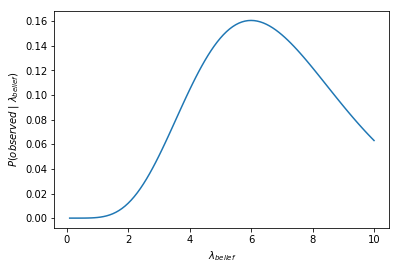

In [5]:
lambdas = np.linspace(0.1, 10, 100)
likelihoods = [stats.poisson.pmf(data, l) for l in lambdas]

# The value of lambda for which P(X) is highest
mle = np.round(lambdas[np.argmax(likelihoods)])

plt.plot(lambdas, likelihoods)
plt.xlabel('$\lambda_{belief}$')
plt.ylabel('$P(observed \;|\; \lambda_{belief})$')
plt.show()

We observe that the data observed {{data}} is most likely for $\lambda$ $\approx$ {{mle}}.

Below we show the Poisson distributions for multiple values of $\lambda$.

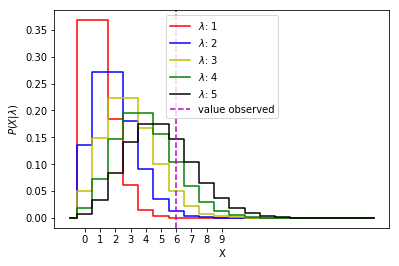

In [6]:
X = np.arange(-1, 20)
mus = [1, 2, 3, 4, 5]
colors = ['r', 'b', 'y', 'g', 'k']

fig, ax = plt.subplots()
for idx, mu in enumerate(mus):
    ax.plot(X, stats.poisson.pmf(X, mu=mu), linestyle='steps-mid', 
             c=colors[idx], label="$\lambda$: %d" %mu )

ax.axvline(x=data, linestyle='--', c='m', label='value observed')
ax.legend(loc='upper center')
plt.xticks(np.arange(10))
plt.xlabel('X')
plt.ylabel('$P(X|\lambda)$')

plt.show()

In the graph above, we should confirm (and convince ourselves) that for the value $X$ observed, the highest probability of that value $P(X|\lambda_{belief})$ is given by the Poission distribution with $\lambda_{belief}$ = {{mle}}

### 3. Computing likelihood of multiple observations for one value of parameter $\lambda$

Similarly to what we did in 1., we want to compute the probability of observing data $X$ given a parameter hypothesis $\lambda$. In this case, however, we generalize $X$ to a vector of multiple observations:
$$ X = [x_1, x_2, ..., x_n] $$. 

We want to compute $P(X \;|\; \lambda )$. For this purpose, we assume that every observation is independent and identically distributed (i.i.d).

\begin{align}
P(X \;|\; \lambda ) &= P(x_1, x_2, ..., x_n \;|\; \lambda) \\
&= P(x_1 \;|\; \lambda) \; P(x_2 \;|\; \lambda) \;... P(x_n \;|\; \lambda)
\end{align}

In [7]:
# The true parameter lambda of the Poisson random variable, which we do 
# not observe
N = 2
lambda_true = 5
data = stats.poisson.rvs(lambda_true, size=N)
print ("Observed data: %s" % data)

lambda_belief = 4
# Likelihood of each data point: P(x_1|lambda), ..., P(x_n|lambda):
indpt_likelihooods  = stats.poisson.pmf(data, lambda_belief)
# Likelihood of all data points (i.i.d.)
joint_likelihood = np.array(indpt_likelihooods).prod()

Observed data: [5 3]


For $\lambda$ = {{lambda_belief}}, the likelihood of observing all the data points $x_1, ..., x_n$ is $P(X \;|\; \lambda)$ = {{round(joint_likelihood, 2)}}.

Remember that each observation is indepdently, identically distributed (i.i.d.)

### 4. Computing likelihood of multiple observations for multiple values of parameter $\lambda$

Compute $P(x_1, x_2, ..., x_n \;|\; \lambda)$ for observed data points {{data}}

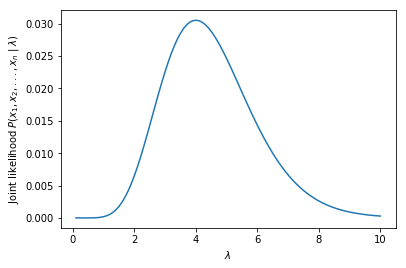

In [8]:
# Lambdas for which to compute the joint likelihood of the data observed
lambdas_belief = np.linspace(0.1, 10, 100)
# Joint likelihoods
joint_likelihoods = np.zeros(lambdas_belief.shape) 

for idx, lb in enumerate(lambdas_belief):
    # For lambda = lb, joint_likelihood = P(x_1|lambda), ..., P(x_n|lambda)
    joint_likelihood = np.array( stats.poisson.pmf(data, lb) ).prod()
    joint_likelihoods[idx] = joint_likelihood

plt.plot(lambdas_belief, joint_likelihoods)
plt.xlabel('$\lambda$')
plt.ylabel('Joint likelihood $P(x_1, x_2, ..., x_n \;|\; \lambda)$')
plt.show()

## B. Updating Posteriors in 1D

[Good resource](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)

### Compute the Prior (Uniform)

We believe the data to come from a Poisson distribution $Poi(\lambda)$. But which Poisson distribution? Each $\lambda$ describes a Poisson distribution. We have no prior belief regarding what the $\lambda$ should be, so we can describe this parameter through a prior uniform distribution.

In [9]:
lambdas_belief = np.linspace(0.1, 10, 100)
priors = stats.uniform.pdf(lambdas_belief, loc=0, scale=10)

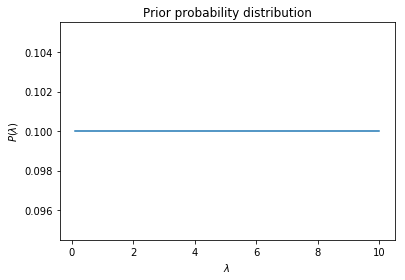

In [10]:
plt.plot(lambdas_belief, priors)
plt.xlabel('$\lambda$')
plt.ylabel('$P(\lambda)$')
plt.title('Prior probability distribution')
plt.show()

### Observe the data
The data is generated by a Poisson random variable with true $\lambda_{true}$, which of course we cannot observe in reality, but is rather inferred.

In [11]:
# Data
lambda_true = 1
# Number of observations
N = 1
data = stats.poisson.rvs( lambda_true, size=N )
print ("Observed: %s " % data)

Observed: [2] 


### Compute likelihood from the data

In [12]:
# Lambdas for which to compute the joint likelihood of the data observed
lambdas_belief = np.linspace(0.1, 10, 100)
joint_likelihoods = np.zeros(lambdas_belief.shape) 

for idx, lb in enumerate(lambdas_belief):
    # For lambda = lb, 
    # Joint_likelihood = P(x_1, x_2, ...|lambda) = P(x_1|lambda), ..., P(x_n|lambda)
    joint_likelihood = np.array( stats.poisson.pmf(data, lb) ).prod()
    joint_likelihoods[idx] = joint_likelihood

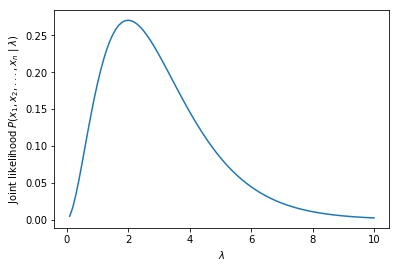

In [13]:
plt.plot(lambdas_belief, joint_likelihoods)
plt.xlabel('$\lambda$')
plt.ylabel('Joint likelihood $P(x_1, x_2, ..., x_n \;|\; \lambda)$')
plt.show()

### Update the posterior distribution

Now, let's update our belief about the parameter $\lambda$ given the data we've observed.

In [14]:
joint_posteriors = priors * joint_likelihoods

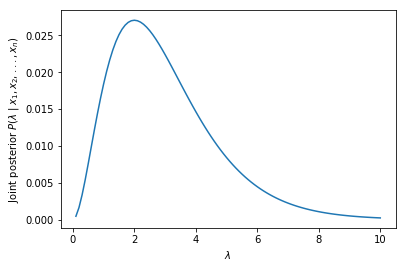

In [15]:
plt.plot(lambdas_belief, joint_posteriors)
plt.xlabel('$\lambda$')
plt.ylabel('Joint posterior $P(\lambda \;|\; x_1, x_2, ..., x_n )$')
plt.show()

It seems as though the posterior didn't change. This is due to the fact that the prior was uniform. We didn't have any strong beliefs about what the parameter $\lambda$ should be, so our posterior belief about $\lambda$ is proportional to the likelihood.

### Same process, using Exponential prior
Let's try with an exponential prior now.

In [60]:
# Prior
lambdas_belief = np.linspace(0.1, 10, 100)
exp_priors = stats.expon.pdf(lambdas_belief)

# Data
data = [0, 0, 0]
print ("Observed: %s " % data)

# Likelihood
joint_likelihoods = np.zeros(lambdas_belief.shape) 
for idx, lb in enumerate(lambdas_belief):
    joint_likelihood = np.array( stats.poisson.pmf(data, lb) ).prod()
    joint_likelihoods[idx] = joint_likelihood

# Posterior
posteriors = exp_priors * joint_likelihoods

Observed: [0, 0, 0] 


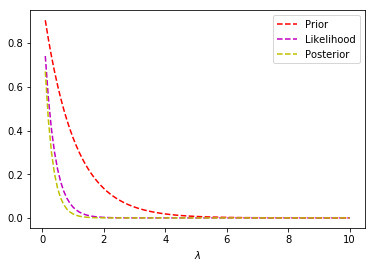

In [69]:
plt.plot(lambdas_belief, exp_priors, c='r', ls='--', label='Prior')
plt.plot(lambdas_belief, joint_likelihoods, c='m', ls='--', label='Likelihood')
plt.plot(lambdas_belief, posteriors, c='y', ls='--', label='Posterior')
plt.xlabel('$\lambda$')
plt.legend(loc='upper right')
plt.show()

Given that our prior assigns higher probability to smaller values of $\lambda$, our posterior is higher for smaller $\lambda$'s.

### With normal distributions

__ Case: __ uniform prior and normal likelihood

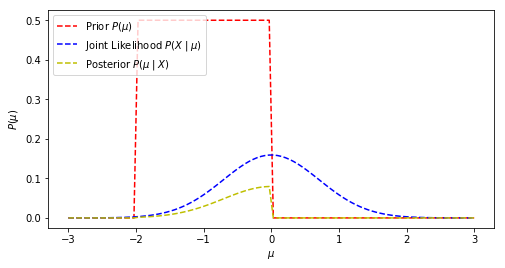

In [122]:
mus = np.linspace(-3, 3, 100)
scale = 1
prior = stats.uniform.pdf(mus, loc=-2, scale=2)

data = [0, 0]

# P(X | mu_1, mu_2, ...), where scale is fixed
joint_likelihoods = np.zeros(x.shape)
for idx, mu in enumerate(mus):
    joint_likelihood = np.array( stats.norm.pdf(data, loc=mu, scale=scale) ).prod()
    joint_likelihoods[idx] = joint_likelihood

posterior = prior * joint_likelihoods

figsize(8, 4)
plt.xlabel('$\mu$')
plt.ylabel('$P(\mu)$')
plt.plot(mus, prior, c='r', ls='--', label='Prior $P(\mu)$')
plt.plot(mus, joint_likelihoods, c='b', ls='--', label='Joint Likelihood $P(X \;|\; \mu)$')
plt.plot(mus, posterior, c='y', ls='--', label='Posterior $P(\mu \;|\; X)$')
plt.legend(loc='upper left')
plt.show()

__ Case: __ normal prior and normal likelihood

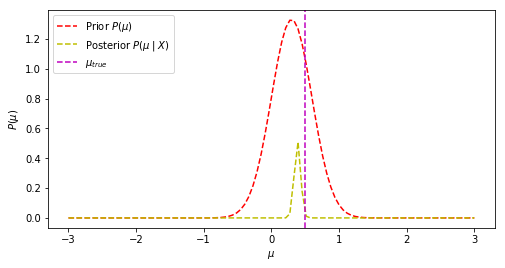

In [185]:
mus = np.linspace(-3, 3, 100)

scale_prior = 0.3
mu_prior = 0.3
prior = stats.norm.pdf(mus, loc=mu_prior, scale=scale_prior)

scale = 0.3
mu_true = 0.5
data = stats.norm.rvs(loc=mu_true, scale=scale, size=(40,1))

# Joint likelihoods: P(X | mu) (where scale is fixed)
likelihoods = np.zeros(x.shape)
# Total probability: P(X) = P(X|mu) P(mu)
total_probability = 0

for idx, mu in enumerate(mus):
    # Compute likelihood vector: [ P(X | mu) ] = [ P(x1, ..., xn | mu) ] = [ P(x1 | mu), ..., P(xn | mu) ]
    likelihood_vector = stats.norm.pdf(data, loc=mu, scale=scale)
    # Compute joint likelihood: P(X | mu) = P(x1, ..., xn | mu) = P(x1 | mu) ... P(xn | mu)
    likelihood = np.array( likelihood_vector ).prod()
    # Joint likelihood for plotting
    likelihoods[idx] = likelihood
    
    # P(mu)
    p_mu = prior[idx]
    # P(X) = P(X | mu) * P(mu)
    total_probability += likelihood * p_mu
    
# Normalized posterior
posterior = prior * likelihoods / total_probability

figsize(8, 4)
plt.xlabel('$\mu$')
plt.ylabel('$P(\mu)$')
plt.plot(mus, prior, c='r', ls='--', label='Prior $P(\mu)$')
plt.plot(mus, posterior, c='y', ls='--', label='Posterior $P(\mu \;|\; X)$')
plt.axvline(mu_true, c='m', ls='--', label='$\mu_{true}$')
plt.legend(loc='upper left')
plt.show()

Does more data mean that the mean of the posterior is closer to the true value of $\mu_{true}$?  
Yes, the more values we use to compute our likelihood, the closest our posterior is to the true value of $\mu$, $\mu_{true}$. 

The posterior mean eventually converges to the true mean $\mu_{true}$, given enough data.  

How well the posterior distribution converges to the true value of $\mu_{true}$ depends on the amount of data given (the more data, the more closely it converges), and how closely the prior matches the real value of $\mu_{true}$ (the more accurate the prior, the more closely the posterior converges).

The same is true with a bivariate normal distribution.

We plot the likelihood separately, because the values of the probability are so small, that they are very difficult to see when plotted alongside the prior and normalized posterior.

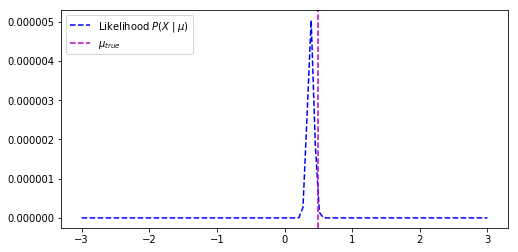

In [187]:
plt.plot(mus, likelihoods, c='b', ls='--', label='Likelihood $P(X \;|\; \mu)$')
plt.axvline(mu_true, c='m', ls='--', label='$\mu_{true}$')
plt.legend(loc='upper left')
plt.show()

__ Case: __ linear prior, normal likelihood

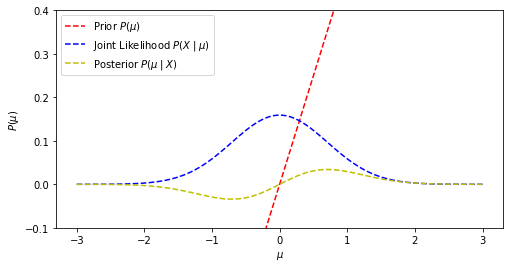

In [116]:
mus = np.linspace(-3, 3, 100)
scale = 1
prior = 0.5 * mus

data = [0, 0]

# P(X | mu_1, mu_2, ...), where scale is fixed
joint_likelihoods = np.zeros(x.shape)
for idx, mu in enumerate(mus):
    joint_likelihood = np.array( stats.norm.pdf(data, loc=mu, scale=scale) ).prod()
    joint_likelihoods[idx] = joint_likelihood

posterior = prior * joint_likelihoods

figsize(8, 4)
plt.xlabel('$\mu$')
plt.ylabel('$P(\mu)$')
plt.ylim(-0.1, 0.4)
plt.plot(mus, prior, c='r', ls='--', label='Prior $P(\mu)$')
plt.plot(mus, joint_likelihoods, c='b', ls='--', label='Joint Likelihood $P(X \;|\; \mu)$')
plt.plot(mus, posterior, c='y', ls='--', label='Posterior $P(\mu \;|\; X)$')
plt.legend(loc='upper left')
plt.show()